# Распределение Гаусса #

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Гауссовские-случайные-величины" data-toc-modified-id="Гауссовские-случайные-величины-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Гауссовские случайные величины</a></span><ul class="toc-item"><li><span><a href="#Определение" data-toc-modified-id="Определение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Определение</a></span></li><li><span><a href="#Свойства" data-toc-modified-id="Свойства-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Свойства</a></span></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Примеры</a></span></li></ul></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span><ul class="toc-item"><li><span><a href="#Случайный-вектор" data-toc-modified-id="Случайный-вектор-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Случайный вектор</a></span></li><li><span><a href="#Ковариационная-матрица" data-toc-modified-id="Ковариационная-матрица-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ковариационная матрица</a></span></li><li><span><a href="#Многомерное-нормальное-распределение" data-toc-modified-id="Многомерное-нормальное-распределение-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Многомерное нормальное распределение</a></span></li><li><span><a href="#Двумерное-нормальное-распределение" data-toc-modified-id="Двумерное-нормальное-распределение-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Двумерное нормальное распределение</a></span><ul class="toc-item"><li><span><a href="#Примеры" data-toc-modified-id="Примеры-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Примеры</a></span></li></ul></li><li><span><a href="#Аффинное-преобразование-многомерного-нормального-распределения" data-toc-modified-id="Аффинное-преобразование-многомерного-нормального-распределения-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Аффинное преобразование многомерного нормального распределения</a></span></li><li><span><a href="#Генерация-выборки-гауссовских-векторов" data-toc-modified-id="Генерация-выборки-гауссовских-векторов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Генерация выборки гауссовских векторов</a></span></li></ul></li><li><span><a href="#Маргинальные-и-условные-распределения" data-toc-modified-id="Маргинальные-и-условные-распределения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Маргинальные и условные распределения</a></span><ul class="toc-item"><li><span><a href="#Маргинальные-(частные)-распределения" data-toc-modified-id="Маргинальные-(частные)-распределения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Маргинальные (частные) распределения</a></span></li><li><span><a href="#Условные-распределения" data-toc-modified-id="Условные-распределения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Условные распределения</a></span></li></ul></li><li><span><a href="#Задания" data-toc-modified-id="Задания-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задания</a></span></li><li><span><a href="#Литература" data-toc-modified-id="Литература-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Литература</a></span></li></ul></div>

In [1]:
# Imports
import sys
sys.path.append('../scripts')
import graph_utils
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Styles
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['lines.linewidth'] = 2.
matplotlib.rcParams['lines.markersize'] = 7
# cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

In [3]:
%%html
<style>
    .container.slides .celltoolbar, .container.slides .hide-in-slideshow {display: None ! important;}
</style>

## Гауссовские случайные величины ##

### Определение ###

Если $\xi$ &mdash; случайная величина с гауссовской (нормальной) плотностью (probability density function, pdf)

$$ f_\xi(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}, \quad \sigma>0, \quad -\infty < \mu < \infty, $$

то смысл параметров $\mu$ и $\sigma$ оказывается очень простым:
$$ \mu = \mathrm{E} \xi, \quad \sigma^2 = \mathrm{D} \xi . $$

Таким  образом, рапределение вероятностей этой случайной величины $\xi$, называемой *гауссовской* или *нормально распределённой*, полностью определяется её средним значением $\mu$ и дисперсией $\sigma^2$. В этой связи часто используется запись
$$ \xi \sim \mathcal{N}\left( \mu, \sigma^2 \right). $$

In [4]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution"""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

### Свойства ###

1. Если $\xi$ и $\eta$ — гауссовские случайные величины, то из их *некоррелированности* следует их *независимость*.

2. Сумма двух независимых гауссовских случайных величин снова есть гауссовская случайная величина со средним $\mu_1 + \mu_2$ и дисперсией $\sigma_1^2 + \sigma_2^2$.

3. **Центральная предельная теорема:** распределение суммы большого числа независимых случайных величин или случайных векторов, подчиняющихся не слишком стеснительным условиям, хорошо аппроксимируется нормальным распределением.

### Примеры ###

Ниже приведены примеры трёх одномерных нормальных распределений:

1. $\mathcal{N}(-1, 1)$,
1. $\mathcal{N}(2, 0.5)$,
1. $\mathcal{N}(1, 1.5)$.

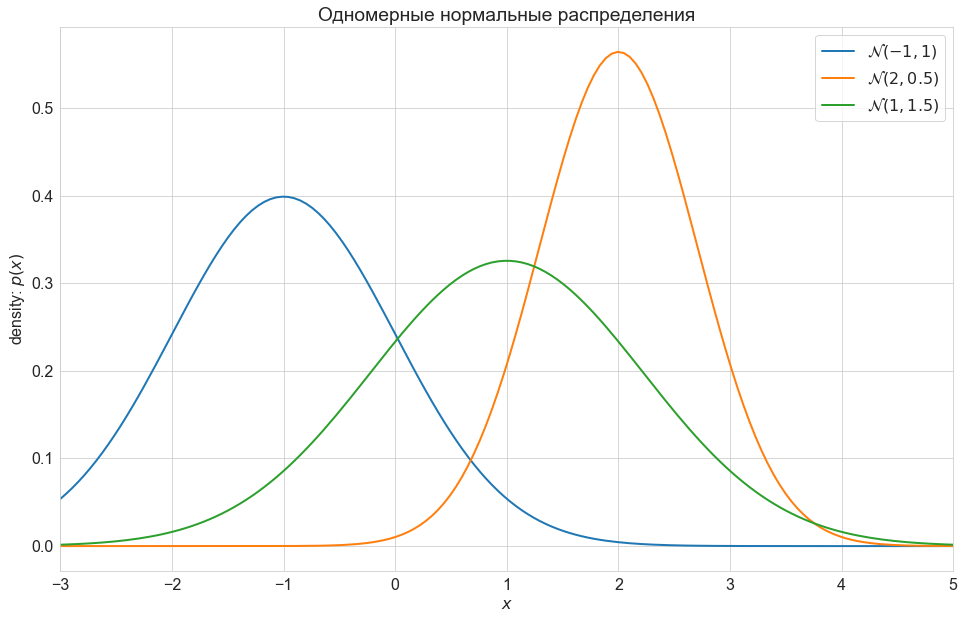

In [5]:
graph_utils.hide_code_in_slideshow()
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=150)
fig = plt.figure(figsize=(16, 10))
plt.plot(
    x, univariate_normal(x, mean=-1, variance=1), 
    label="$\mathcal{N}(-1, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=0.5), 
    label="$\mathcal{N}(2, 0.5)$")
plt.plot(
    x, univariate_normal(x, mean=1, variance=1.5), 
    label="$\mathcal{N}(1, 1.5)$")
plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Одномерные нормальные распределения')
# plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
# fig.subplots_adjust(bottom=0.15)
plt.show()

In [6]:
N = int(1e5)
m1, s1 = -1., 1.
X1 = np.random.normal(loc=m1, scale=s1, size=N)
m2, s2 = 2., 0.5**0.5
X2 = np.random.normal(loc=m2, scale=s2, size=N)

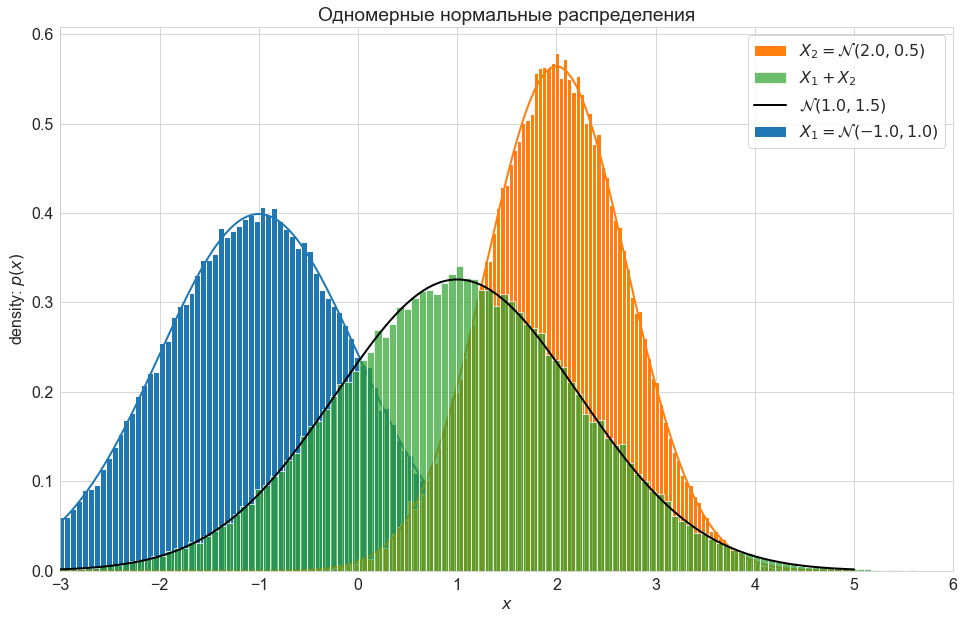

In [7]:
graph_utils.hide_code_in_slideshow()

bins = 150
fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(1,1,1)
plt.hist(X1, bins=bins, density=True, label=f"$X_1=\mathcal{{N}}({m1}, {s1**2:.2})$", zorder=1)
plt.plot(x, univariate_normal(x, mean=m1, variance=s1**2), c=cm.tab10(0), zorder=1)
plt.hist(X2, bins=bins, density=True, label=f"$X_2=\mathcal{{N}}({m2}, {s2**2:.2})$", zorder=2)
plt.plot(x, univariate_normal(x, mean=m2, variance=s2**2), c=cm.tab10(1), zorder=2)

plt.hist(X1+X2, bins=bins, density=True, alpha=0.7, label="$X_1+X_2$", zorder=3)
ms, ss = m1+m2, s1**2+s2**2
plt.plot(x, univariate_normal(x, mean=ms, variance=ss), c='k',
         label=f"$\mathcal{{N}}({ms}, {ss:.3})$", zorder=3)

plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Одномерные нормальные распределения')
plt.xlim([-3, 6])
# plt.ylim([0, 1])

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[1:]+[handles[0]], labels[1:]+[labels[0]])
plt.show()

---

## Многомерное нормальное распределение ##

### Случайный вектор ###

**Определение.** Всякий упорядоченный набор случайных величин $\vec{\xi} = (\xi_1, \ldots, \xi_n)$ будем называть *$n$-мерным случайным вектором*.

**Определение.** Математическим ожиданием случайного вектора будем называть вектор математических ожиданий его каждой компоненты: $\mathrm{E}\vec{\xi} = (\mathrm{E}\xi_1, \ldots, \mathrm{E}\xi_n)$.

Для математического ожидания случайного вектора справедливы все свойства математического ожидания случайной величины.
В том числе *линейность:* $\mathrm{E}(A\vec{\xi} + B\vec{\eta}) = A \cdot \mathrm{E}\vec{\xi} + B \cdot \mathrm{E}\vec{\eta}$.

### Ковариационная матрица ###

Пусть $\vec\xi = \left( \xi_1, \dots, \xi_n \right)$ &mdash; случайный вектор, компоненты которого имеют конечный второй момент. Назовём *матрицей ковариаций* (ковариационной матрицей) вектора $\xi$ матрицу (порядка $n \times n$) $\Sigma = ||\Sigma_{ij}||$, где $\Sigma_{ij} = \text{cov}\left( \xi_i, \xi_j \right)$.

Ковариационная матрица случайного вектора является многомерным аналогом дисперсии случайной величины для случайных векторов.
На диагонали $\Sigma$ располагаются дисперсии компонент вектора, а внедиагональные элементы &mdash; ковариации между компонентами.

**Свойства ковариационной матрицы:**

1. $\mathrm{cov}(\vec\xi) = \mathrm{E}\left[(\vec\xi -\mathrm{E}\vec\xi) \cdot (\vec\xi -\mathrm{E}\vec\xi)^\top \right]$
1. $\mathrm{cov}(\vec\xi) = \mathrm{E}[\vec\xi \cdot \vec\xi^\top] - \mathrm{E}[\vec\xi] \cdot \mathrm{E}[\vec\xi^\top]$
1. Положительная полуопределённость: $\mathrm{cov}(\vec\xi) \ge 0$
1. Аффинное преобразование: $\mathrm{cov}(A\vec\xi + \vec{b}) = A \cdot \mathrm{cov}(\vec\xi) \cdot A^\top$

**Предложение**. Ковариационная матрица случайного вектора является *симметричной* и *неотрицательно определённой*.

> *Упражнение.* Доказать, что ковариационная матрица случайного вектора является *неотрицательно определённой*.

Справедлив и обратный результат.

**Предложение.** Для того, чтобы матрица $\Sigma$ порядка $n \times n$ была ковариационной матрицей некоторого случайного вектора $\vec\xi = \left( \xi_1, \dots, \xi_n \right)$, необходимо и достаточно, чтобы эта матрица была симметричной и положительно определённой.

*Доказательство*. Тот факт, что всякая ковариационная матрица является симетричной и положительно определённой будем считать доказанным.
Покажем теперь обратное, что $\Sigma$ является ковариационной матрицей некоторого случайного вектора.

Пусть $\vec\eta$ &mdash; вектор нормально распределённых случайных величин $\vec\eta \sim \mathcal{N}(0, 1)$.
Покажем, что вектор $\vec\xi = L\vec\eta$ имеет ковариационную матрицу $\Sigma$.

Воспользуемся *разложением Холецкого* &mdash; представлением симметричной положительно определённой матрицы в виде произведения нижнетреугольной матрицы $L$ и верхнетреугольной матрицы $L^\top$.

$$
\mathrm{cov}(\vec\xi) = \mathrm{E} \vec\xi \cdot \vec\xi^\top = \mathrm{E}(L\vec\eta)(L\vec\eta)^\top = L \cdot \mathrm{E}\vec\eta \cdot \vec\eta^\top \cdot L^\top = L I_d L^\top = LL^\top = \Sigma. \mathrm{\square}
$$

### Многомерное нормальное распределение ###

Многомерное нормальное распределение представляет собой многомерное обобщение одномерного нормального распределения. Оно представляет собой распределение многомерной случайной величины, состоящей из нескольких случайных величин, которые могут быть скоррелированы друг с другом.

Как и одномерное, многомерное нормальное распределение определяется набором параметров: вектором средних значений $\mathbf{\mu}$, который является вектором математических ожиданий распределения, и ковариоционной матрицей $\Sigma$, которая измеряет степень зависимости двух случайных величин и их совместного изменения.

Многомерное нормальное распределение случайного вектора $\overline{\xi}$ размерностью $n$ имеет следующую функцию плотности совместной вероятности:

$$
f_n(\vec{x}|\vec{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp{ \left( -\frac{1}{2}(\vec{x} - \vec{\mu})^\top \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)}.
$$

Здесь $\vec{x}$ &mdash; случайный вектор размерностью $n$, $\vec{\mu}$ &mdash; вектор математического ожидания, $\Sigma$ &mdash; ковариационная матрица (симметричная, положительно определённая матрица с размерностью $n \times n$, $\Sigma_{ij} = \text{cov}(\xi_i, \xi_j)$), а $\lvert\Sigma\rvert$ &mdash; её определитель.
Многомерное нормальное распределение принято обозначать следующим образом: 

$$
    \vec{\xi} \sim \mathcal{N}(\vec{\mu}, \Sigma)
$$

>*Замечание.* Далее для простоты записи стрелка над вектором будет опускаться, т. е. вместо $\vec{\xi}$ будем писать просто $\xi$.

Многомерное нормальное распределение случайного вектора $\overline{\xi}$ размерностью $n$ имеет следующую функцию плотности совместной вероятности:

$$
f_n(\vec{x}|\vec{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp{ \left( -\frac{1}{2}(\vec{x} - \vec{\mu})^\top \Sigma^{-1} (\vec{x} - \vec{\mu}) \right)}.
$$

Здесь $\vec{x}$ &mdash; случайный вектор размерностью $n$, $\vec{\mu}$ &mdash; вектор математического ожидания, $\Sigma$ &mdash; ковариационная матрица (симметричная, положительно определённая матрица с размерностью $n \times n$, $\Sigma_{ij} = \text{cov}(\xi_i, \xi_j)$), а $\lvert\Sigma\rvert$ &mdash; её определитель.

In [8]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-0.5*(np.linalg.solve(covariance, x_m).T.dot(x_m))))

### Двумерное нормальное распределение ###

В качестве примера рассмотрим двумерный случайный вектор. В этом случае плотность $p(x_1, x_2)$ может быть приведена к виду
$$
    f_{\xi,\eta}(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \, \exp\left\{-\frac{1}{2(1-\rho^2)} \left[ \frac{(x_1-m_1)^2}{\sigma_1^2} - 2\rho\frac{(x_1-m_1)(x_2-m_2)}{\sigma_1\sigma_2} + \frac{(x_2-m_2)^2}{\sigma_2^2} \right]\right\},
$$

где \
    $m_1 = \mathrm{E} \xi$, $m_2 = \mathrm{E} \eta$ &mdash; математические ожидания, \
    $\sigma_1^2 = \mathrm{D} \xi$, $\sigma_2^2 = \mathrm{D} \eta$ &mdash; стандартное отклонение $x_i$, \
    $\rho = \dfrac{\mathrm{cov}(\xi, \eta)}{\sigma_1 \cdot \sigma_2}$ &mdash; коэффициент корреляции.
    
**Замечание.** Можно убедиться, что если пара ($\xi$, $\eta$) &mdash; гауссовская, то из некоррелированности $\xi$ и $\eta$ следует их независимость. \
Действительно, если $\rho=0$, то
$$
    f_{\xi,\eta}(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2} \, \exp\left\{-\frac{(x_1-m_1)^2}{2\sigma_1^2}\right\} \, \exp\left\{-\frac{(x_2-m_2)^2}{2\sigma_2^2}\right\}
    = f_\xi(x_1) \cdot f_{\eta}(x_2).
$$

#### Примеры ####

Примеры двумерных нормальных распределений приведены ниже.

1. Двумерное распределение с ковариацией между $x_1$ и $x_2$ равной $0$ (независимые переменные):
$$
\mathcal{N}\left(
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}, 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 
\end{bmatrix}\right)
$$

2. Двумерное распределение параметров $x_1$ и $x_2$ с отличной от $0$ ковариацией (скоррелированые переменные):
$$
\mathcal{N}\left(
\begin{bmatrix}
    0 \\
    0.5
\end{bmatrix}, 
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1
\end{bmatrix}\right)
$$
Увеличение $x_1$ увеличивает вероятность того, что $x_2$ также увеличится.

In [9]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

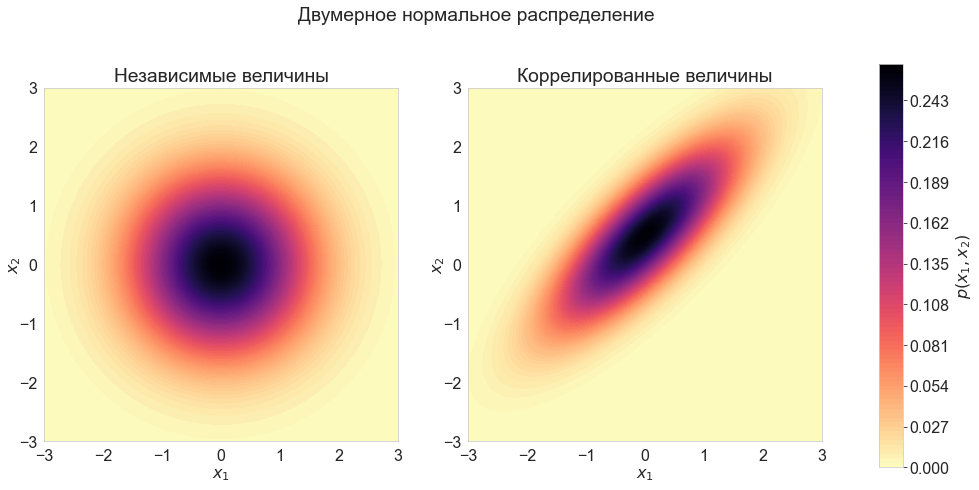

In [10]:
graph_utils.hide_code_in_slideshow()
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
d = 2  # number of dimensions
cmap = cm.magma_r

# Generate independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution 1
con = ax1.contourf(x1, x2, p, 100, cmap=cmap)
# Plot 95% Interval
# e = make_ellipse(bivariate_mean, bivariate_covariance)
# ax1.add_artist(e)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', va='center')
ax1.axis([-3., 3., -3., 3.])
ax1.set_aspect('equal')
ax1.set_title('Независимые величины')


# Generate correlated Normals
bivariate_mean = np.matrix([[0.], [0.5]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution 2
con = ax2.contourf(x1, x2, p, 100, cmap=cmap)
# Plot 95% Interval
# e = make_ellipse(bivariate_mean, bivariate_covariance)
# ax2.add_artist(e)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', va='center')
ax2.axis([-3., 3., -3., 3.])
ax2.set_aspect('equal')
ax2.set_title('Коррелированные величины')

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$')
plt.suptitle('Двумерное нормальное распределение', y=0.95)
plt.show()

### Аффинное преобразование многомерного нормального распределения ###
 
Многомерное нормальное распределение можно преобразовать с помощью аффинного преобразования. Так, если $X$ &mdash; нормально распределённый случайный вектор, а $Y = u + LX$ &mdash; аффинное преобразованием $X$ с матрицей $L$ и вектором $u$, то $Y$ также нормально распределён со средним значением $\mu_{Y} = u + L\mu_{X}$ и ковариационной матрицей $\Sigma_{Y} = L\Sigma_{X}L^\top$.

$$X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \quad\quad Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^\top) = u + L\mathcal{N}(\mu_{X}, \Sigma_{X})$$

Это можно доказать следующим образом:

$$\mu_{Y} = \mathrm{E}[Y] = \mathrm{E}[u + LX] = u + \mathrm{E}[LX] = u + L\mu_{X}$$

$$\begin{split}
\Sigma_{Y} & = \mathrm{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathrm{E}[(u+LX - u-L\mu_{X})(u+LX - u-L\mu_{X})^\top] \\
           & = \mathrm{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathrm{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathrm{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}$$

### Генерация выборки гауссовских векторов ###

Предыдущая формула поможет нам сгенерировать гауссовский вектор с заданными вектором средних знгачений и ковариационной матрицей. \
Для этого сгенерируем вектор $X$, подчиняющийся стандартному нормальному распределению $X \sim \mathcal{N}(0, I_d)$ со средним значением $\mu_{X} = 0$ и единичной ковариационной матрицей $\Sigma_{X} = I_d$. Генерация такого вектора не представляет труда, так как каждая переменная в $X$ независима от всех других переменных, и мы можем просто генерировать каждую переменную отдельно, пользуясь одномерным распределением Гаусса.

Для генерации $Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y})$ возьмём $X$ и применим к нему аффинное преобразование $Y = u + LX$. Из предыдущего раздела мы знаем, что ковариация $Y$ будет $\Sigma_{Y} = L\Sigma_{X}L^\top$. Поскольку $\Sigma_{X}=I_d$, а $\mu_{X} = 0$, то $\Sigma_{Y} = L L^\top$ и $\mu_{Y} = u$.
В итоге получаем, что искомое преобразование $Y = \mu_{Y} + L_{Y}X$, где матрица $L_{Y}$ &mdash; нижнетреугольная матрица, которую можно найти с  помощью разложения Холецкого матрицы $\Sigma_{Y}$.

В качестве иллюстрации сгенерируем 100 двумерных векторов для следующего распределения:

$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix}
    0 \\ 
    1 
\end{bmatrix},
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1
\end{bmatrix}\right).
$$

In [11]:
def make_ellipse(mu, cov, ci=0.95, color='gray', label='$\pm 2\,\sigma$'):
    """Make covariance isoline"""
    e, v = np.linalg.eig(cov)
    angle = np.sign(v[1, 0]) * 180/np.pi * np.arccos(v[0, 0])
    q = stats.chi2(2).ppf(ci)
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle,
                fill=False, color=color, label=label)
    return e

In [12]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [0.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)

# Sample X from standard normal
n = 100  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = (mean + L.dot(X)).T

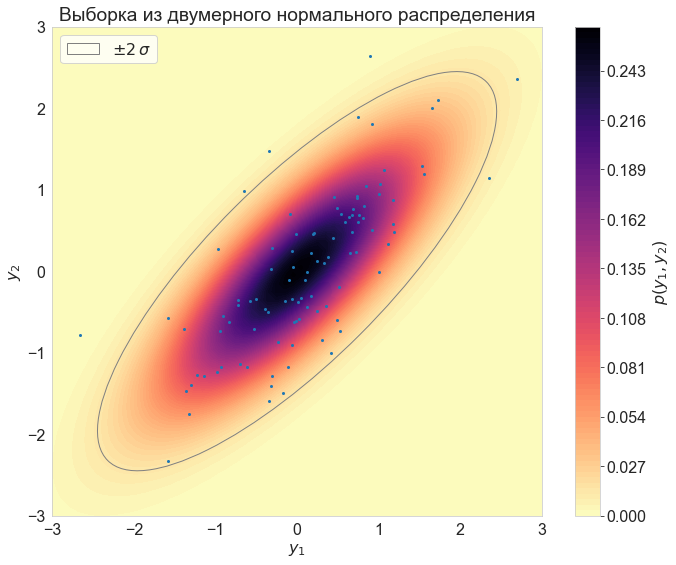

In [13]:
graph_utils.hide_code_in_slideshow()
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(12, 9))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.magma_r)
# Plot 95% Interval
e = make_ellipse(mean, covariance)
ax.add_artist(e)
# Plot samples
s = ax.plot(Y[:,0], Y[:,1], 'o', c=cm.tab10(0), ms=2, label='точки')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.axis([-3., 3., -3., 3.])
ax.set_aspect('equal')
ax.set_title('Выборка из двумерного нормального распределения')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('$p(y_1, y_2)$')

plt.legend(handles=[e, ], loc=2)
plt.show()

---

## Маргинальные и условные распределения ##

Пусть дан нормальный случайный вектор $\mathbf{z}$ с $n$ компонентами.
Пусть $\mathbf{z} = (\mathbf{x}, \mathbf{y})$, где $\mathbf{x}$ и $\mathbf{y}$ &mdash; два подвектора вектора $\mathbf{z}$ с $n_1$ и $n_2$ компонентами, соответственно; $n = n_1 + n_2$.
В этом случае говорят, что случайные векторы $\mathbf{x}$ и $\mathbf{y}$ имеют *совместное нормальное распределение*, определяемое следующим образом:

$$
\begin{bmatrix}
    \mathbf{x} \\
    \mathbf{y} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
    \mu_{\mathbf{x}} \\
    \mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
    \Sigma_{11} & \Sigma_{12} \\
    \Sigma_{21} & \Sigma_{22}
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma).
$$

Здесь $\Sigma_{11}$ — корреляционная матрица вектора $\mathbf{x}$, $\Sigma_{22}$ — корреляционная матрица вектора $\mathbf{y}$, а матрицы $\Sigma_{12}$ и $\Sigma_{21} = \Sigma_{12}^T$ состоят из корреляций компонент вектора $\mathbf{x}$ и $\mathbf{y}$ (взаимные корреляционные матрицы).
Вектор математического ожидания $\mathrm{E}\mathbf{z} = \mathbf{\mu}$ также разбивается на два подвектора $\mathrm{E}\mathbf{x} = \mathbf{\mu_x}$ и $\mathrm{E}\mathbf{y} = \mathbf{\mu_y}$.

In [14]:
d = 2  # dimensions
mean = np.matrix([[0.], [0.]])
cov = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
Sigma_11 = cov[0, 0]
Sigma_22 = cov[1, 1]
Sigma_12 = cov[0, 1]  # = Sigma_21 transpose in this case

### Маргинальные (частные) распределения ###

>Название &laquo;частное распределение&raquo; используется в переводах под редакцией Колмогорова, &laquo;маргинальное распределение&raquo; &mdash; в более современной литературе путём заимствования из английского языка (англ. marginal distribution). Название в английском языке в свою очередь является переводом с немецкого (нем. Randverteilungen) из публикации Колмогорова: A. Kolmogoroff &laquo;Grundbegriffe der Wahrscheinlichkeitsrechnung&raquo;, Springer-Verlag, 1933. [[1]](https://ru.wikipedia.org/wiki/%D0%A7%D0%B0%D1%81%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Маргинальное распределение &mdash; это вероятностное распределение подмножества случайных величин, рассматриваемых в качестве компоненты или множества компонент некоторого известного многомерного распределения. Оно представляет собой распределение вероятностей переменных в подмножестве вне зависимости от значений других переменных в исходном распределении.

В случае двумерного нормального распределения частными распределениями являются одномерные распределения каждой компоненты $\mathbf{x}$ и $\mathbf{y}$ по отдельности. Они определяются так:
$$
\begin{aligned}
    f_\xi(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, \Sigma_{11}) \\
    f_\eta(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, \Sigma_{22}).
\end{aligned}
$$

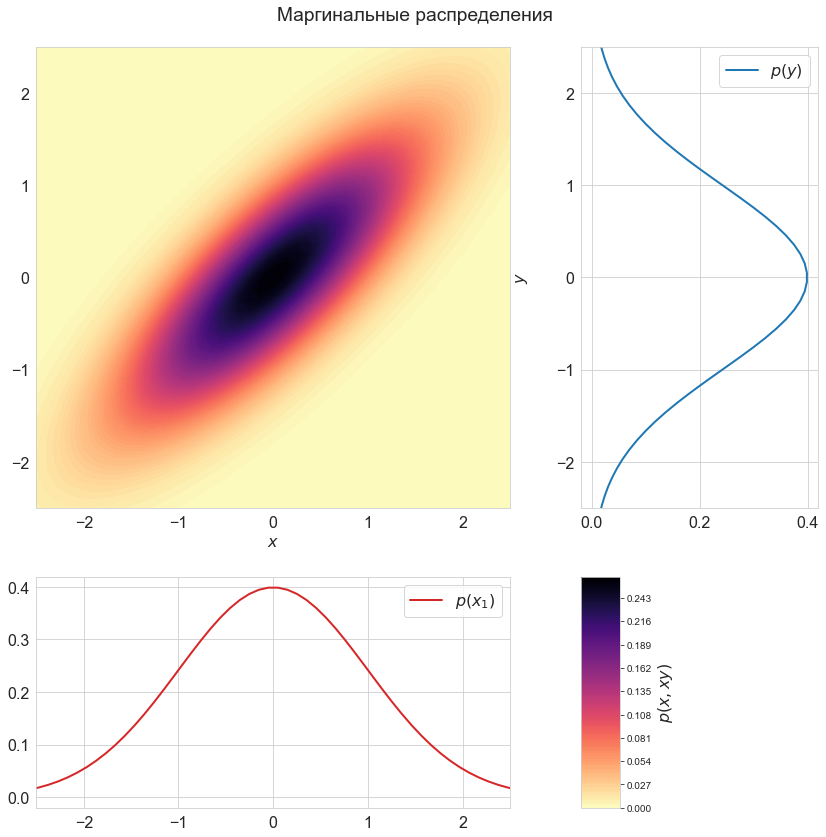

In [15]:
graph_utils.hide_code_in_slideshow()
# Plot the conditional distributions
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Маргинальные распределения', y=0.92)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mean_y, Sigma_22)
# Plot univariate distribution
ax2.plot(py, y, '-', c=cm.tab10(0), label=f'$p(y)$')
ax2.legend(loc=0)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mean_x, Sigma_11)
# Plot univariate distribution
ax3.plot(x, px, '-', c=cm.tab10(3), label=f'$p(x_1)$')
ax3.legend(loc=0)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, xy)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

### Условные распределения ###

Условное распределение $\mathbf{x}$ при фиксированном $\mathbf{y}$ можно получить с помощью формулы Байеса
$$
    p(\mathbf{x}|\mathbf{y}) = \frac{p(\mathbf{x}, \mathbf{y})}{p(\mathbf{y})} \propto 
    \frac{\exp\left\{(\mathbf{x, y})^\top \Sigma^{-1} (\mathbf{x, y})\right\}}{\exp\left\{\mathbf{y}^\top \Sigma_{22}^{-1} \mathbf{y}\right\}} \label{eq:GP_bayes}\tag{1}.
$$

Оно также подчиняется нормальному закону:
$$ p(\mathbf{x}|\mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y}) $$

с *условным математическим ожиданием*
$$ \mu_{x|y} = \mu_x + \Sigma_{12}\Sigma_{22}^{-1}(\mathbf{y}-\mu_y) \label{eq:GP_mean}\tag{2} $$

и *условной ковариационной матрицей*
$$ \Sigma_{x|y} = \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^\top. \label{eq:GP_cov}\tag{3} $$

Отметим, что условная ковариационная матрица не зависит от $\mathbf{y}$, а условное математическое ожидание является линейной функцией от $\mathbf{y}$.
Другими словами, выражение $\eqref{eq:GP_mean}$ определяет функцию *линейной регрессии* (зависимости условного математического ожидания вектора $\mathbf{x}$ от заданного значения случайного вектора $\mathbf{y}$), где $\Sigma_{12}\Sigma_{22}^{-1}$ &mdash; матрица коэффициентов регрессии.

Сдвиг математического ожидания можно рассматривать как невязку условной переменной $(\mathbf{y}-\mu_y)$, нормализованную с ковариационной матрицей условной переменной $\Sigma_{22}$ и преобразованную в пространство переменной $\mathbf{x}$. Последнее делается с помощью матрицы ковариаций между $\mathbf{x}$ и $\mathbf{y}$ &mdash; $\Sigma_{12}$.

**Теорема.** Условное математическое ожидание является проекцией на подпространство функций от случайных величин, стоящих в условии условного математического ожидания.

Построим условные распределения $p(x|y= 2)$ и $p(y|x=-1)$.

In [16]:
# Calculate x|y
y_condition = 1.5  # To condition on y
mean_xgiveny = mean_x + (Sigma_12 * (1/Sigma_22) * (y_condition - mean_y))
cov_xgiveny = Sigma_11 - Sigma_12 * (1/Sigma_22) * Sigma_12
print(f'mean_x|y={mean_xgiveny:0.2}, cov_x|y={cov_xgiveny:0.4}')

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (Sigma_12 * (1/Sigma_11) * (x_condition - mean_x))
cov_ygivenx = Sigma_22 - (Sigma_12 * (1/Sigma_11) * Sigma_12)
print(f'mean_y|x={mean_ygivenx:0.2}, cov_y|x={cov_ygivenx:0.4}')

mean_x|y=1.2, cov_x|y=0.36
mean_y|x=-0.8, cov_y|x=0.36


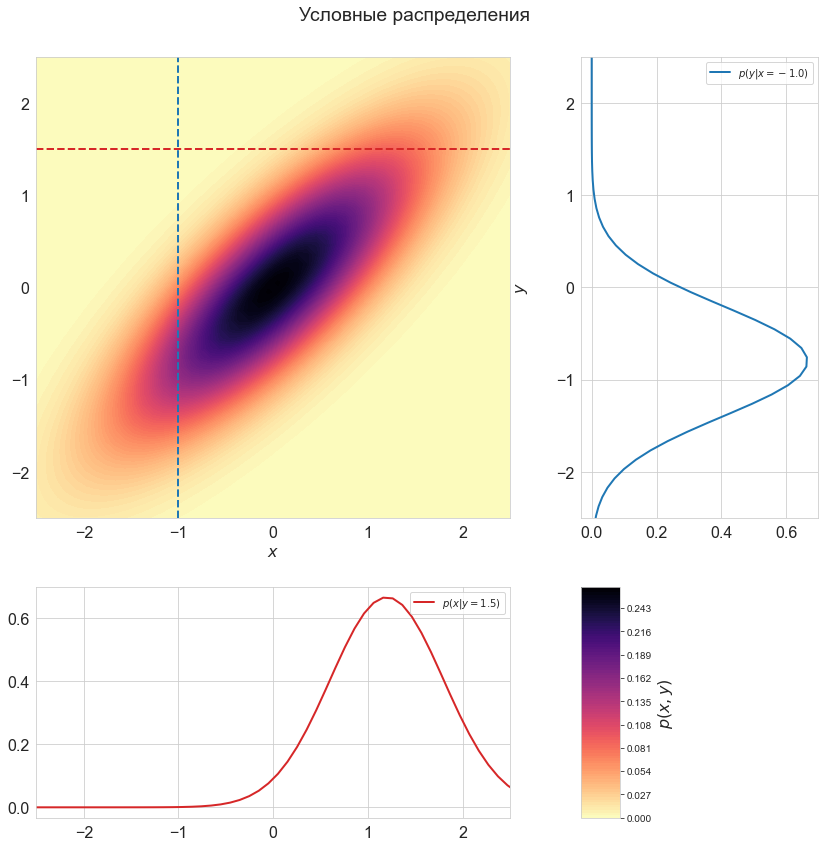

In [17]:
graph_utils.hide_code_in_slideshow()
# Plot the conditional distributions
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Условные распределения', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], '--', c=cm.tab10(3))
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-2.5, 2.5], '--', c=cm.tab10(0))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -2.5, 2.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=100)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, '-', c=cm.tab10(0), label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0, fontsize=10)
# ax2.set_xlabel('density')
ax2.set_ylim(-2.5, 2.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=100)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, '-', c=cm.tab10(3), label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0, fontsize=10)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('$p(x, y)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

---

## Задания ##

1. Напишите функцию, осуществляющую разложение Холецкого симметричной положительно определённой матрицы $A = L L^\top$.
2. Применяя формулу Байеса ([1](#mjx-eqn-eq:GP_bayes)), получите формулы для условного математического ожидания ([2](#mjx-eqn-eq:GP_mean)) и условной ковариационной матрицы ([3](#mjx-eqn-eq:GP_cov)). *Подсказка*: используёте следующий результат для обращения блочной матрицы:
$$
\Sigma =
\begin{bmatrix}
    P & Q \\
    R & S
\end{bmatrix},
\quad
\Sigma^{-1} =
\begin{bmatrix}
    \tilde{P} & \tilde{Q} \\
    \tilde{R} & \tilde{S}
\end{bmatrix},
$$
где
$$
\begin{aligned}
    \tilde{P} &\;= \left(P-QS^{-1}R\right)^{-1}     & =\;& P^{-1} + P^{-1}Q\tilde{S}RP^{-1} \\
    \tilde{Q} &\;= -\tilde{P}QS^{-1}                & =\;& -P^{-1}Q\tilde{S} \\
    \tilde{R} &\;= -S^{-1}R\tilde{P}                & =\;& -\tilde{S}RP^{-1}  \\
    \tilde{S} &\;= S^{-1} + S^{-1}R\tilde{P}QS^{-1} & =\;& \left(S-RP^{-1}Q\right)^{-1}.
\end{aligned}
$$

## Литература ##

1. *Roelants P.* [Multivariate normal distribution](https://peterroelants.github.io/posts/multivariate-normal-primer/).
1. *Ширяев А.Н.* Вероятность &mdash; 1. &mdash; М.: МЦНМО, 2007. &mdash; 517 с.
1. *Rasmussen C.E., Williams C.K.I.* [Gaussian Processes for Machine Learning](http://www.gaussianprocess.org/gpml/). &mdash; The MIT Press, 2006. &mdash; 248 p.

In [18]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.11
numpy: 1.20.3
matplotlib: 3.5.1
seaborn: 0.11.2
